# Visualization in Python

In the previous sprint, we've covered some of the most basic summary statistics that are commonly used in data science to concisely describe how the values in a given sample behave. When you introduce a data set, it's really important to use these summary statistics profusely. For any variable, it's recommended to report at least:
- a measure of data **size**: e.g. $n$: the number of observations; so sommon that it's easy to forget
- a measure of **central tendency**: e.g., $\mu$, the mean
- a measure of **dispersion**: e.g., $\sigma$, the standard deviation, IQR, a range, ...

To complement that more prosaic description, however, there is nothing like a good plot. Plotting your data is crucial, in order to explore it yourself, but also to be able to construct a solid narrative around it that is engaging for other people. Visual assets invariably appeal to an audience and a good data scientist must also be a good plotter. In this print, we'll cover some of the more basic plotting types that we'll frequently encounter throughout the course. Because visualization is such a diverse topic, we can only scratch the tip of the iceberg in this sprint and we'll come across many other plot types in the course of this class.

![<img src=https://blog.revolutionanalytics.com%2F2017%2F05%2Fthe-datasaurus-dozen.html/>](https://blog.revolutionanalytics.com/downloads/DataSaurus%20Dozen.gif)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basic plotting

For this sprint, let us return to the Arthurian manuscripts data.

In [2]:
df = pd.read_csv("../../datasets/arthur/manuscripts.csv", index_col=0)
df

,signature,repository,script,text-height,text-width,text-src,illustrations,date_min,date_max,leaf-height,leaf-width,leaf-src,number-lines,material,physical-type,country,region,columns
1,"Schloss Anholt (Isselburg), Fürstl. Salm-Salm'...","Schloss Anholt (Isselburg), Fürstl. Salm-Salm'...",textualis,220.0,164.0,original,0,1320.0,1325.0,308.0,215.0,current,32.0,parchment,fragment,NaN,NaN,2.0
2,"Berlin, Staatsbibliothek, germ. fol. 923, 38","Berlin, Staatsbibliothek",NaN,NaN,NaN,NaN,0,1300.0,1400.0,NaN,NaN,NaN,NaN,parchment,fragment,Germany,Bayern,NaN
3,"Linz, Landesarchiv, 96/IV/54","Linz, Landesarchiv",NaN,212.0,163.0,original,0,1390.0,1410.0,280.0,200.0,current,31.0,paper,codex,NaN,NaN,2.0
4,"Brussels, Koninklijke Bibliotheek, II 115,2","Brussels, Koninklijke Bibliotheek",textualis,185.0,132.0,original,0,1340.0,1360.0,230.0,155.0,original,39.0,parchment,fragment,Southern Netherlands,Flanders,2.0
5,"Munich, Staatsbibliothek, cgm. 5249 / 3b","Munich, Staatsbibliothek",textualis,195.0,127.0,original,0,1275.0,1300.0,232.0,160.0,current,42.0,parchment,fragment,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,"Orléans, Bibliothèque Municipale, -","Orléans, Bibliothèque Municipale",NaN,NaN,NaN,NaN,0,1200.0,1300.0,150.0,105.0,current,30.0,parchment,fragment,NaN,NaN,1.0
1163,"Freiburg, Universitätsbibliothek, 513","Freiburg, Universitätsbibliothek",NaN,150.0,115.0,original,0,1290.0,1310.0,160.0,140.0,current,NaN,parchment,fragment,NaN,NaN,2.0
1164,"Paris, Bibliothèque Nationale de France, fr. 340","Paris, Bibliothèque Nationale de France",NaN,NaN,NaN,NaN,76,1400.0,1425.0,420.0,300.0,current,53.0,parchment,codex,NaN,NaN,3.0
1165,"Heidelberg, Universitätsbibliothek, Cpg 397","Heidelberg, Universitätsbibliothek",textualis,165.0,100.0,original,0,1225.0,1250.0,198.0,122.0,current,26.0,parchment,codex,Germany,Rheinfranken,1.0


Let us focus on the two pairs of physical measurements that we have here:
- `leaf-height` and `leaf-width` (which describe the size of the full pages of each book)
- `text-height` and `text-width` (which describe the size of the text area on the pages)

Both measurements are expressed in millimeters.

To avoid the NAs, we'll stick to the complete cases:

In [3]:
dimensions = df[["leaf-height", "leaf-width", "text-height", "text-width"]].dropna()
dimensions

,leaf-height,leaf-width,text-height,text-width
1,308.0,215.0,220.0,164.0
3,280.0,200.0,212.0,163.0
4,230.0,155.0,185.0,132.0
5,232.0,160.0,195.0,127.0
9,260.0,128.0,224.0,128.0
...,...,...,...,...
1155,340.0,230.0,220.0,140.0
1159,334.0,230.0,185.0,290.0
1160,95.0,160.0,250.0,190.0
1163,160.0,140.0,150.0,115.0


## Matplotlib and Seaborn and Pandas and Plotly and....

In Python, there are are *many* ways of plotting data. Here we will cover only some of the most common ones that you are likely to see in the wild. The most basic way of plotting is to use the methods built right in to `pandas`. These are pretty simplistic, but they are a great way for you to inspect the data visually as you're working with it.

We all know what a typical book looks like and, in fact, the average dimensions of books haven't changed all that much in the past centuries. It is obvious, for instance, that the height of a book is related to the width of the book. We can be excused for hypothesizing: "the higher a page, the wider a page". In the rest of this course, we'll return to this relationship very often and develop much more principled approaches to characterize such a relationship (or "correlation") between two variables. For now, however, let us assume that we just received this dataset and we're still exploring it.

### Scatterplots

One straightforward way to explore the physical dimensions of our books would be to create a two dimensional scatterplot, in which each data point (here: book) is plotted as a dot. On the vertical axis, we plot a book's height, and on the horizontal axis, a book's width.

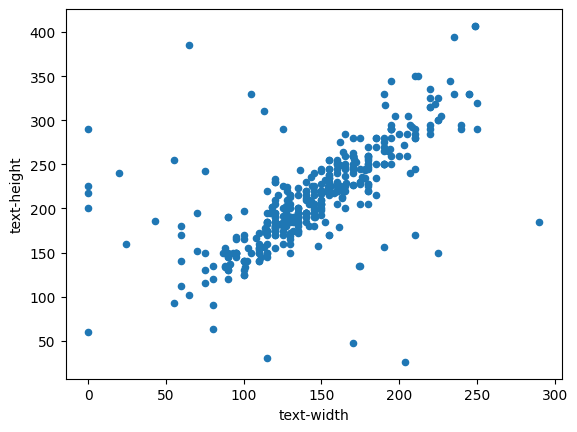

In [4]:
dimensions.plot.scatter("text-width", "text-height")
# magic incantation to cleanly display plots in a notebook:
plt.show()

There's quite a bit of scatter in the data, which has to do with the fact that only fragments of some of these books remain. Nevertheless, we can see a clear relationship between the two variables, as expected. Such visualizations aren't the *end* of a statistical story, but rather the *beginning*: they should urge you to look into this relationship in more detail!

> #### Exercise
>
> The previous plot was for the text dimensions. Can you create a similar plot for the dimensions of the page surface?

In [5]:
# code here

## Seaborn for "prettier" plots

The `pandas` plot is pretty basic. Here is the same plot, but made with `seaborn`, a common plotting library with good integration of basic statistics and regression. We will get more fancy later, but for now notice that we set the `data` parameter to refer to our dataframe, and then use the parameters according to the seaborn `scatterplot()` method. You can find the full documentation [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

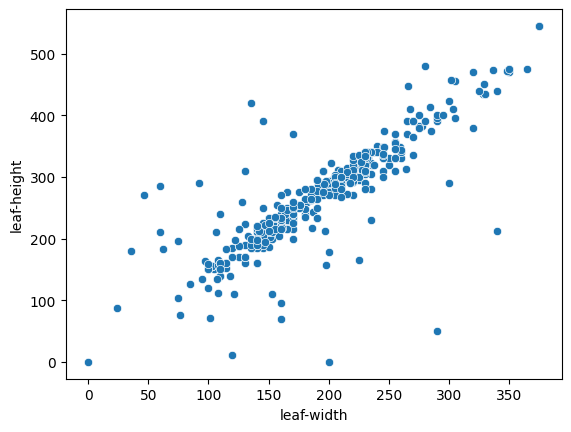

In [6]:
sns.scatterplot(data=dimensions, x="leaf-width", y="leaf-height")
plt.show()

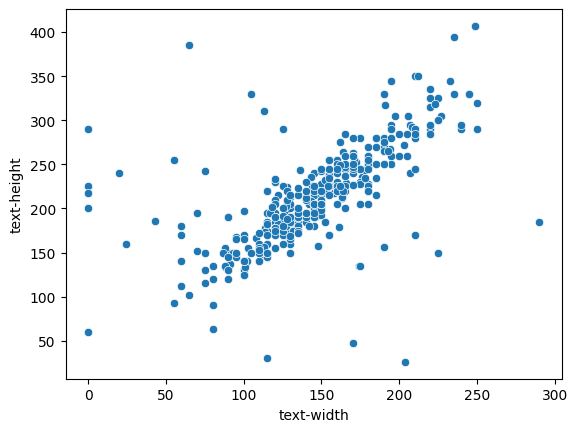

In [7]:
sns.scatterplot(data=dimensions, x="text-width", y="text-height")
plt.show()

## Overlaying Plots

Because the dimensions of the page and the writing surface are expressed on the same scale (millimeters), we can plot them onto the same figure. Let's use different colors or markers/symbols ('plotting characters') for clarity. A nice thing about Seaborn plots is that repeated calls to plotting functions will use the same `Axes` object (this is an underlying `matplotlib` thing, don't worry about it too much). The net result of that is that we can combine all sorts of figures to build more informational plots.

Let's start by just plotting the two different series onto the same axes, but with different colours and markers to tell them apart...

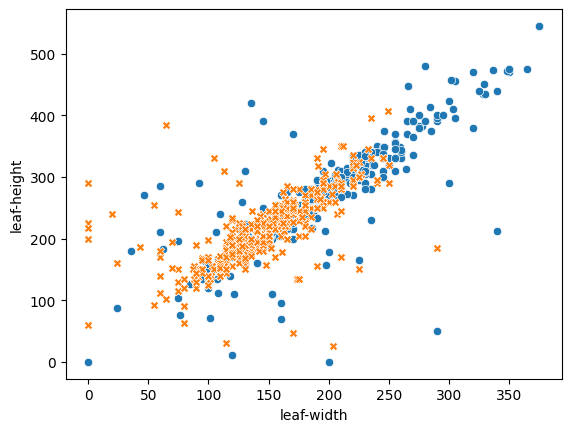

In [8]:
sns.scatterplot(data=dimensions, x="leaf-width", y="leaf-height")
sns.scatterplot(data=dimensions, x="text-width", y="text-height", marker="X")
plt.show()

As you can see, the **coordinates** of the blue points tend to be slightly higher than the red points: that makes sense, because the writing area has to fit on the page; it *has* to be smaller.

The plot above is still pretty ugly though. There is no legend, and the axes labels are generated from the first plotting call. To do better, we will first make a combined dataframe.

In [9]:
leaf = dimensions[["leaf-height", "leaf-width"]].copy()
leaf.columns = ["height", "width"]
leaf["label"] = "leaf"

text = dimensions[["text-height", "text-width"]].copy()
text.columns = ["height", "width"]
text["label"] = "text"

In [10]:
combined = pd.concat([leaf, text])
combined

,height,width,label
1,308.0,215.0,leaf
3,280.0,200.0,leaf
4,230.0,155.0,leaf
5,232.0,160.0,leaf
9,260.0,128.0,leaf
...,...,...,...
1155,220.0,140.0,text
1159,185.0,290.0,text
1160,250.0,190.0,text
1163,150.0,115.0,text


Now let's make a nicer plot. There are a lot of magic incantations here! This can't really be helped -- the best way to learn Python visualisation is to copy an example and then play around (and read the documentation) until we have what we want...

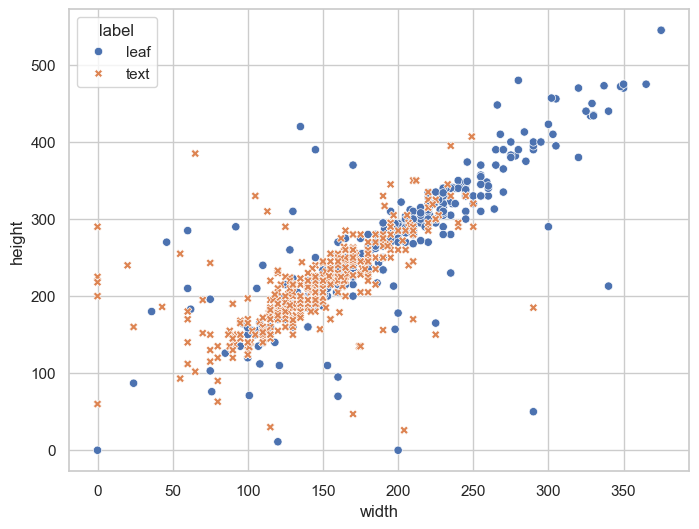

In [11]:
sns.set_theme(
    rc={"figure.figsize": (8, 6)}
)  # sets overall figure shape, units are inches, because America
sns.set_context(
    "notebook",  # determines the size of the fonts and points
)
sns.set_style("whitegrid")  # try 'darkgrid' :)

sns.scatterplot(
    x="width",
    y="height",
    data=combined,
    hue="label",  # change the hue every time the 'label' value changes
    style="label",  # same for the marker style
)
plt.show()
sns.reset_defaults()

This is starting to be more presentable. Note that seaborn makes a legend for us based on the shapes and colours that are used:

Finally, here is an even more complex plot. This `JointPlot` is built into seaborn (documentation [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html)), and adds a **density estimate** along the axes. These are a quick way to show us where most of the data falls (they are like a count histogram but smoothed). (More details on densities and histograms will be discussed later!)

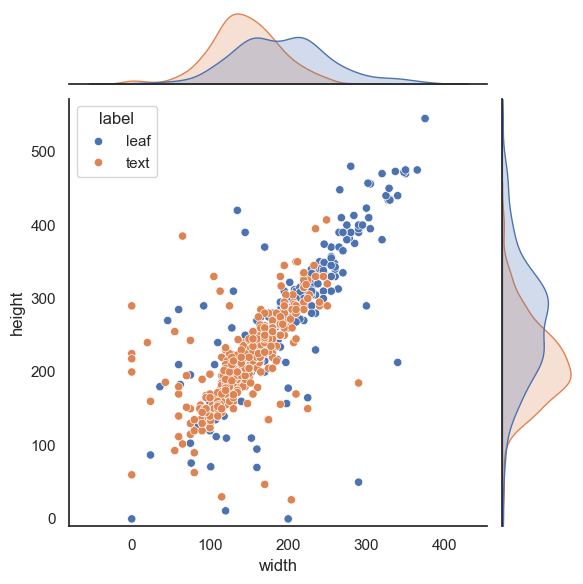

In [12]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
sns.set_context(
    "notebook",
)
sns.set_style("white")

g = sns.jointplot(
    x="width",
    y="height",
    data=combined,
    hue="label",
    ylim=(-10, combined.height.max() * 1.05),
)

plt.show()
sns.reset_defaults()

### Line plots and time series

**Scatterplots**, like the ones we just introduced, are useful for plotting individual data points onto a two-dimensional canvas, i.e. when you have two numeric variables and you'd like to inspect the relationship between them. **Line plots** are an alternative, when you would like to plot "trend lines", for instance. Such trend lines are common when you work with **time series data**, that allow you to track the development of a feature over time: in such cases, the dots that you aim to plot aren't isolated, but connected to one another. They come in a natural, temporal order (unlike the manuscript measurements above).

An interesting time series is offered by the TIME data, which records for every `year` in the dataset, the average proportion of `female`
 faces that were (automatically detected) in the illustrations and photographs published in this periodical. We load this dataset as follows:

In [13]:
time = pd.read_csv("../../datasets/TIME/time-year.csv")
time

,year,female
0,1923,0.114919
1,1924,0.113833
2,1925,0.121891
3,1926,0.164196
4,1927,0.154154
...,...,...
85,2010,0.296973
86,2011,0.309642
87,2012,0.318389
88,2013,0.325029


Again, first a plot straight out of the pandas dataframe for us to look at the data...

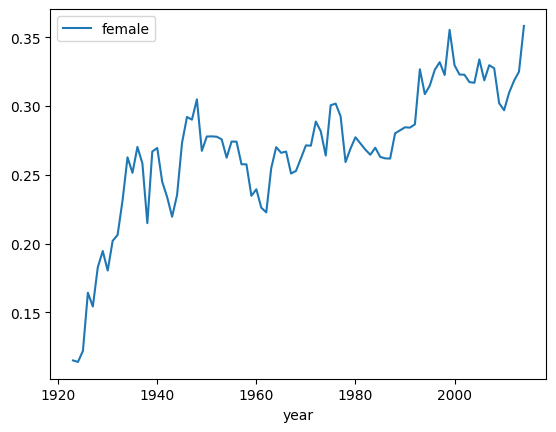

In [14]:
time.plot.line(x="year", y="female")
plt.show()

... and now a fancier plot with seaborn. One thing that a time series hides from us are the positions of individual samples; it would be good to know if we have just as many samples from the 20s as from the 80s, so see if we have some **bias**. Here we use a different way to see how the individual samples are distributed---a **rugplot**. These are very space efficient, while still containing a lot of the intuition of a density plot. Here we can see that most of the proportion datapoints fall within about $(0.25,0.34)$, but the samples are evenly distributed over time, which is nice. Note how, once again, we combine two different seaborn plots on the same `Axes` object by just creating them one after the other.

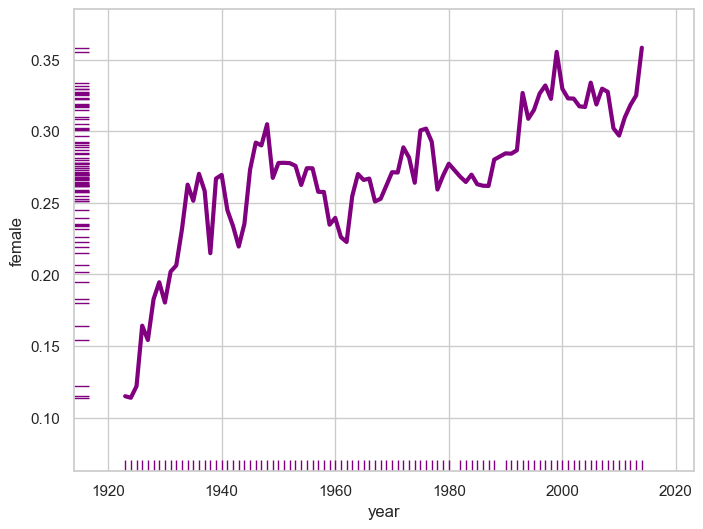

In [15]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
sns.set_context(
    "notebook",
)
sns.set_style("whitegrid")
sns.lineplot(data=time, x="year", y="female", color="purple", linewidth=3)
sns.rugplot(data=time, x="year", y="female", color="purple", linewidth=1)

plt.show()
sns.reset_defaults()  # reset all the style parameters we have changed

As you can see, the proportion of female faces depicted in the magazine has increased over time: very rapidly in the first two decades, and then more steadily afterwards. This is a textbook example of a time series plot, because we chart the development of a particular feature over time.

## Other plots

(In this section, we'll skip most of the univariate plotting types, like the **histogram** and **density plot**, since we will cover these in the next session, on the **normal distribution.**)

### Pie charts

This section will be very short: **don't use pie charts**. Thanks in advance.

### Bar plot

Above we introduced some of the basic plotting mechanisms for combinations of two numeric variables that you can simply project onto a horizontal and vertical axis. However, often you'll be confronted with a combination of a categorical variable (that has distinct "levels") and a numeric variable (e.g. frequency counts for each of these categories). Take for instance, the material of the books in our Arthurian manuscripts data. Which material types are we talking about in fact and how common are they in the dataset? We already saw how we can use `Series.value_counts()` tabulate the respective proportions of the levels in such a categorical variable:

In [16]:
df.material.value_counts()

material
parchment    660
paper        200
Name: count, dtype: int64

Apparently, we are dealing with two kinds of materials: a clear majority of these books are made from parchment, and a smaller subset are made from paper. (Watch out: our data column also contains a high number of `NA`s again (cf. `head()`), but they are silently hidden from us by these commodity functions!) To visualize the relationship between these two variables (counts and categories), a **bar plot** is a very common choice.

Here is the quick way to plot right from the summary `Series` object created by `value_counts()`

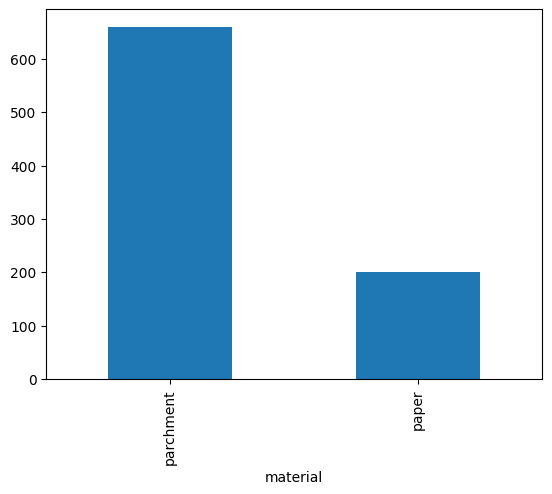

In [17]:
df.material.value_counts().plot.bar()
plt.show()

>##### Exercise
> The bar plot can be easily extended to more than two categories. Can you repeat these visualisations for the `script` column in the data, which records the primary medieval "font" or letter type that is used in these books?

In [18]:
# code here

The seaborn version of this is called a `countplot` (documentation [here](https://seaborn.pydata.org/generated/seaborn.countplot.html))

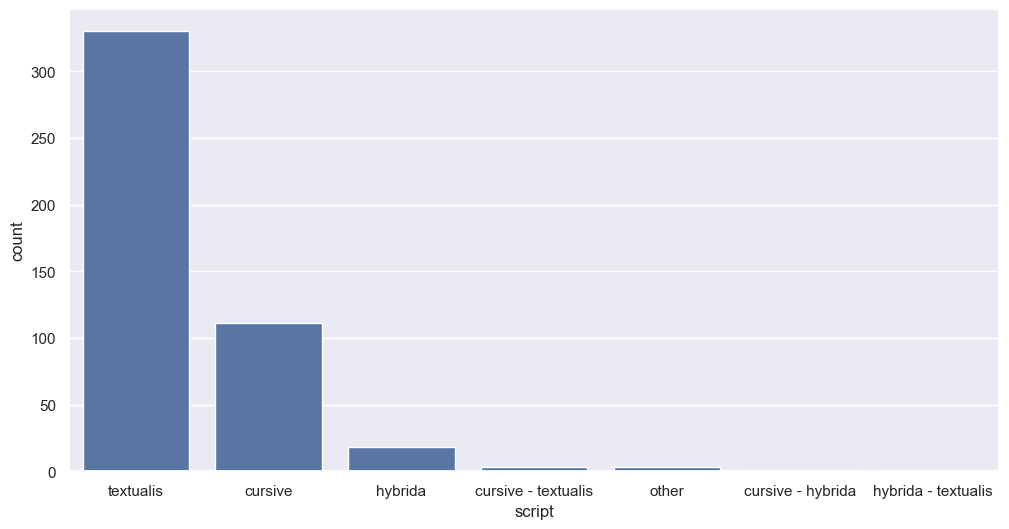

In [19]:
# Make the figure wider to fit the labels. The alternative would be to rotate them....
sns.set_theme(rc={"figure.figsize": (12, 6)})

sns.countplot(data=df[["script"]], x="script")
plt.show()
sns.reset_defaults()

<img src="https://medievalbooks.files.wordpress.com/2013/04/afb-3-schrijfblad.jpg?w=948"/>

*Advertisement sheet for scripts, c. 1450 (The Hague, KB, 76 D 45)*.

### Box plots

Bar plots are useful when you have a single value that you wish to plot for each category, like the cumulative count. Often, however, you'll have multiple counts inside each category and you'd like to find out whether there are different trends in each group. One question that you could ask yourself, for instance, is whether parchment books are larger than paper books? Let us revisit our dimensions data from above, but add the `material` column instead of the date columns this time:

In [20]:
size = df[["leaf-height", "leaf-width", "material"]].dropna()
size["surface"] = size["leaf-height"] * size["leaf-width"]
# Remove the buggy points with zero surface area
size = size[size.surface > 0]
size

,leaf-height,leaf-width,material,surface
1,308.0,215.0,parchment,66220.0
3,280.0,200.0,paper,56000.0
4,230.0,155.0,parchment,35650.0
5,232.0,160.0,parchment,37120.0
9,260.0,128.0,parchment,33280.0
...,...,...,...,...
1160,95.0,160.0,parchment,15200.0
1162,150.0,105.0,parchment,15750.0
1163,160.0,140.0,parchment,22400.0
1164,420.0,300.0,parchment,126000.0


Let us now plot whether the surface of paper books is any different from that of parchment books. To do so, **box plots** are a great instrument in data science, and you'll see *many* of them in the coming weeks, because the information that they convey can be very rich.

Once again, here's the quickest way...

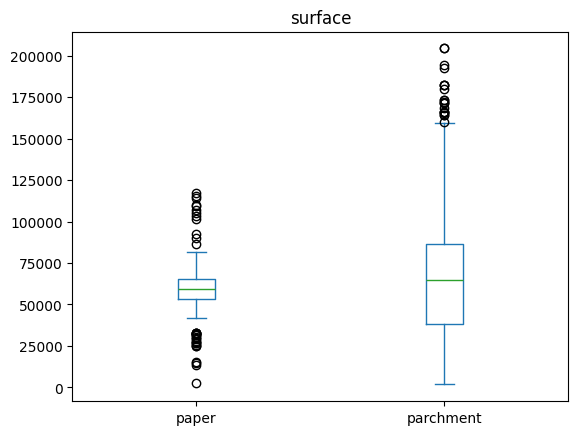

In [21]:
size.plot.box(column="surface", by="material")
plt.show()

... and the most basic seaborn way (We'll let you find the documentation yourself from now on)

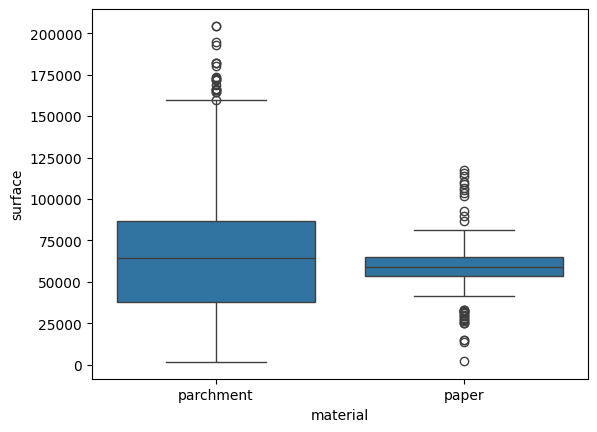

In [22]:
sns.boxplot(data=size, x="material", y="surface")
plt.show()

What can we glean from such boxplots? Quite a lot in fact. Boxplots are great for gleaning the general differences in the distribution across a series of scalar variables across different categories. These plots visualize the spread and centers of your data. For each of the groups or levels in our $x$, they will visualize for our $y$:
 - the **median** (the thick line in the middle)
 - the **hinges**, which come close to the 1st and 3rd quartile or 25% and 75% percentile (which we saw before)
 - the **whiskers**, or the most extreme values *that are not outliers* (= values that are more than 1.5 **interquartile ranges** away from the box)
 - **outliers** (as empty circles) outside the range of the whiskers
 
(*For those of you who speak Dutch, the correct translation of "box plot" is "snorredoos", which sounds really cute in our opinion. An alternative English name is also "whisker plot"*).

For our case study, the box plot would suggest that the median length of paper books is somewhat lower than that of their parchment counterparts, but that difference doesn't strike us as extremely impressive. More relevant seems to be difference in spread around the median, since the parchment surface seem to show a much wider range (with more extended whiskers on top). This might be related to the more standardized production of paper (cf. fixed "ream" sizes) in later times.

Two elements are often added to boxplots, that are worthwhile additions to the standard plotting mechanism:
 - the mean per category, indicated with a symbol
 - the **notches**, that extend across the range $\pm 1.58 \frac{IQR}{\sqrt{n}}$
 
That goes like this:

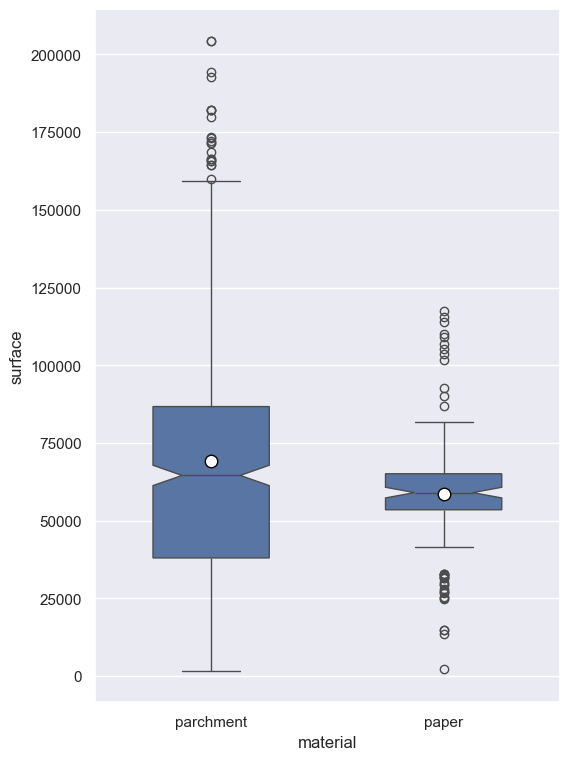

In [23]:
sns.set_theme(rc={"figure.figsize": (6, 9)})

sns.boxplot(
    data=size,
    x="material",
    y="surface",
    notch=True,
    width=0.5,
    showmeans=True,
    # More incantations. The default seaborn symbol for the mean is an ugly green triangle. Try
    # commenting out these lines and see the difference, or changing some of the values below...
    meanprops={
        "marker": "o",
        "markerfacecolor": "white",
        "markeredgecolor": "black",
        "markersize": "9",
    },
)
plt.show()
sns.reset_defaults()

The second addition might sound a bit complicated, but it is in fact a particularly cool feature: *if the notches of two boxes do not overlap at all, their medians will be significantly different* (but overlap is no guarantee for non-significance). Don't worry if this does not make a lot of sense yet, since we'll only cover the vexed topic of statistical significance in the next session.

As for the means, remember from earlier that if the mean is very different to the median, we might be suffering from the effects of **outliers**.

Box plots can tell you a lot (without requiring much effort) by visualizing your measures of spread and center. You should use them often. There are nice extensions too, such as **violinplots**, **splitted box plots** or **rain plots**.

## "Publication" Figures

Finally, let's combine everything we have learned, and make a very fancy figure that would be more like something you might include in a research paper...

First, we install a [Google Font](fonts.google.com) in a way that is visible to Python on any operating system. These fonts have open licenses, which means you shouldn't have a problem using them in papers (however sometimes you will only be allowed to use certain fonts).

NB: don't ever use this particular font in a research paper, it is just a fun example ;)

In [24]:
try:
    import mpl_fontkit as fk
except ImportError:
    # If the package could not be imported, this tried to install it via pip
    %pip install mpl_fontkit

fk.install("UnifrakturCook")

Font name: `UnifrakturCook`


And now the figure. Here we are doing a lot of things:
* Setting a lot of theme elements at once
* Increasing the DPI to make the graphics look 'smoother'
* Combining a violin and a box plot
* Clearer axis labels
* Saving the figure as an SVG

SVG is what is called a *vector format*, which means that it can be zoomed forever and still not suffer from jagged or blurry lines. It is very common for publications to ask for a format like this. You mostly need special software to open these files, but if you open it in your web browser it will work.

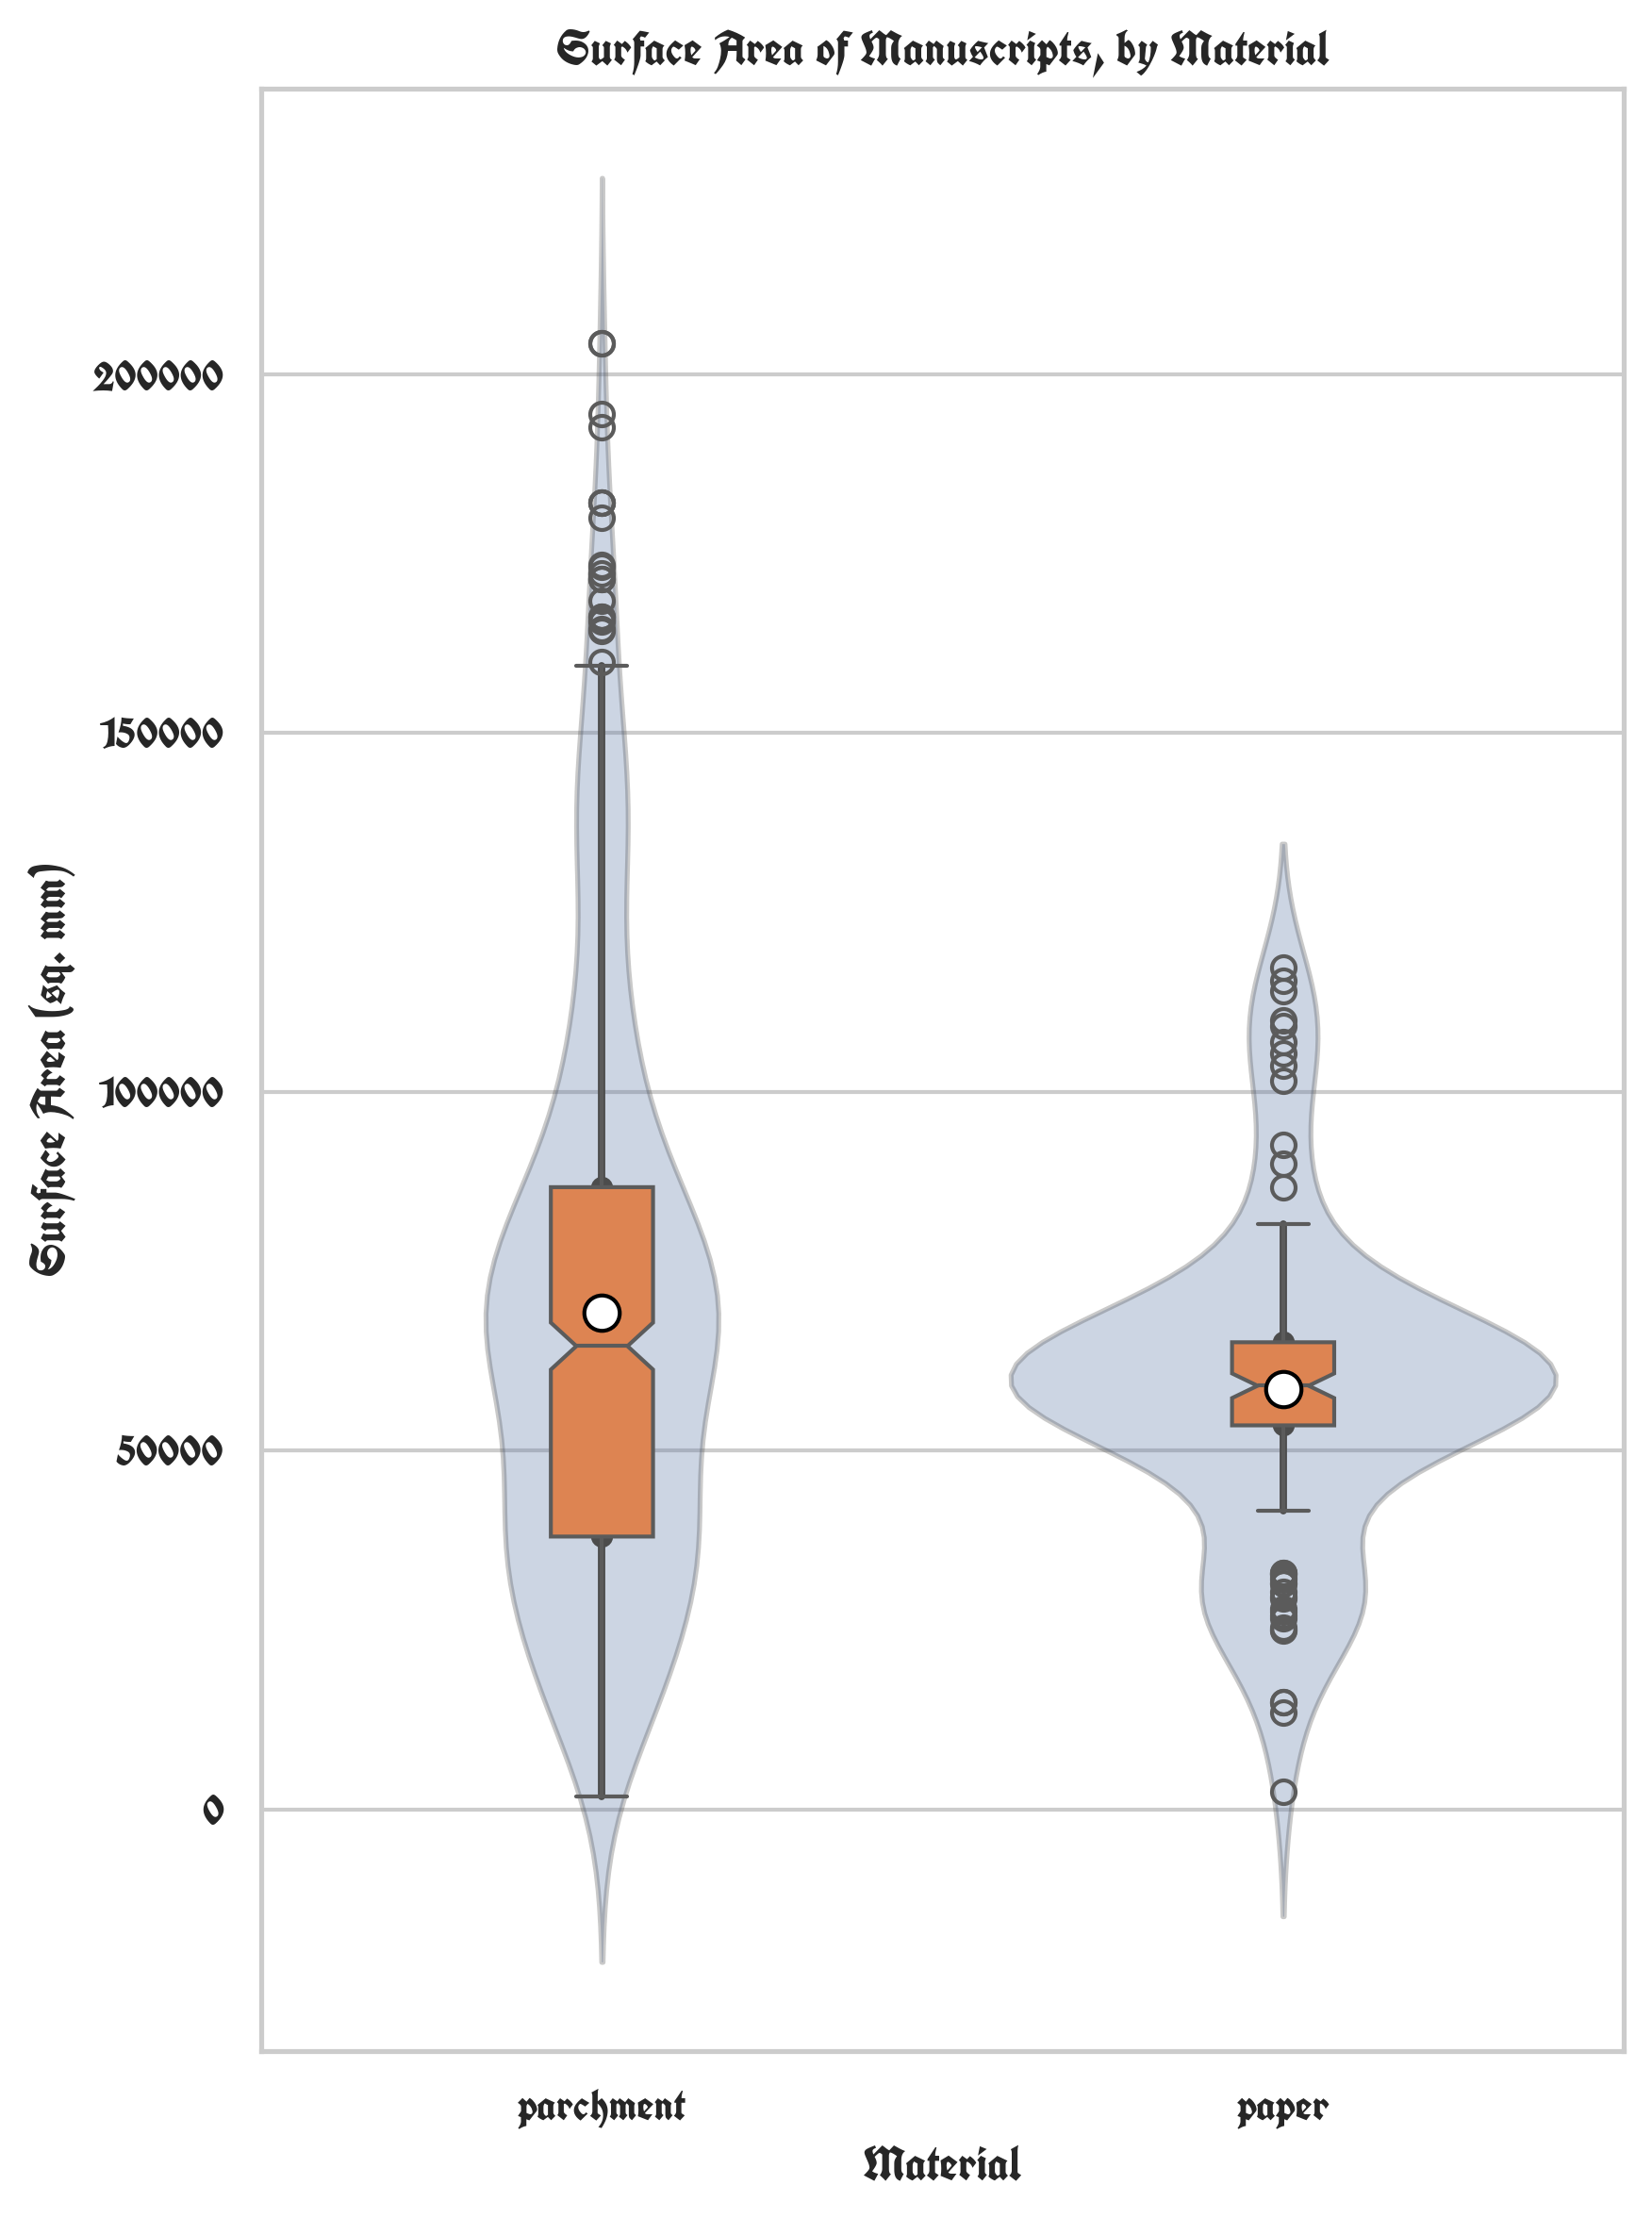

In [25]:
sns.set_theme(
    context="notebook",
    font="UnifrakturCook",
    style="whitegrid",
    rc={"figure.figsize": (6, 8), "figure.dpi": 300},
)

sns.violinplot(data=size, x="material", y="surface", alpha=0.3)

sns.boxplot(
    data=size,
    x="material",
    y="surface",
    notch=True,
    width=0.15,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "white",
        "markeredgecolor": "black",
        "markersize": "9",
    },
    saturation=1,
).set(
    xlabel="Material",
    ylabel="Surface Area (sq. mm)",
    title="Surface Area of Manuscripts, by Material",
)

plt.tight_layout()
# Must call savefig() BEFORE plt.show() !!
plt.savefig("fancybox.svg", format="svg")

plt.show()
sns.reset_defaults()

### Mosaic

In [26]:
from statsmodels.graphics.mosaicplot import mosaic

Scatterplots are great from combinations of two numeric variables; bar plots and box plots are great instruments for working with combinations of a numerical and a categorical variable. But what is available for combinations of *two categorical variables*? Suppose, for instance, that we'd like to learn something about the relationship between material (parchment vs paper) and the script type used in these books? Let us limit to the most common levels for each factor:

In [27]:
df.script.value_counts()

script
textualis              330
cursive                111
hybrida                 18
cursive - textualis      3
other                    3
cursive - hybrida        1
hybrida - textualis      1
Name: count, dtype: int64

In [28]:
scriptmat = df[
    df.script.isin(["textualis", "cursive"]) & df.material.isin(["paper", "parchment"])
]

 Is one of these materials more commonly combined with a specific script type? We can do a mosaic plot to find out:

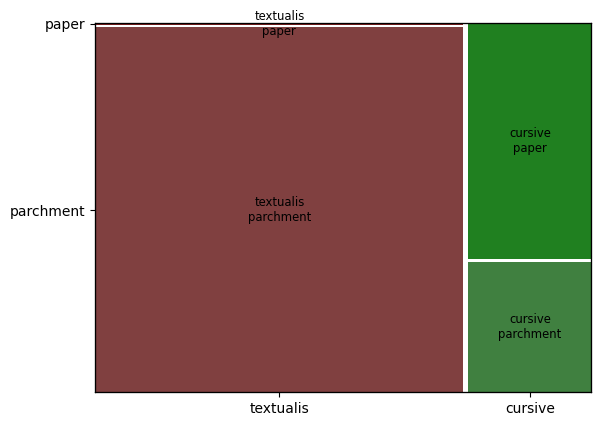

In [29]:
mosaic(scriptmat, ["script", "material"], gap=0.01)
plt.show()

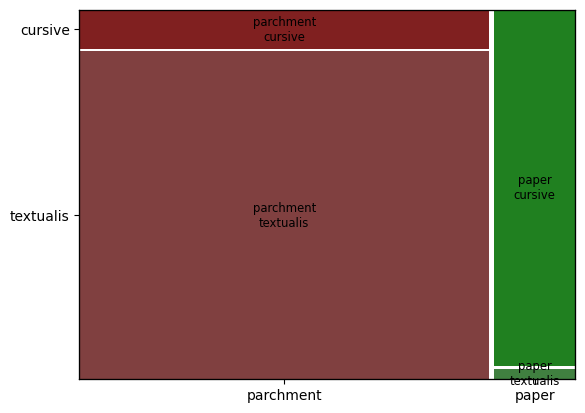

In [30]:
mosaic(scriptmat, ["material", "script"], gap=0.01)
plt.show()

The plot looks a little weird, because apparently almost no paper manuscripts had a textualis script. Whenever you think something looks weird, it's a good habit to just double check...

In [31]:
df[df.material == "paper"]["script"].value_counts()

script
cursive                69
other                   3
textualis               2
cursive - hybrida       1
cursive - textualis     1
hybrida                 1
Name: count, dtype: int64

Mosaic plots are not as commonly used in the Python world (they seem to only be available in the `statsmodels` package we will be using later, not in seaborn or pandas) but they can provide a lot of information about categorical data in the right circumstances.

```
Version History

Current: v1.0.2

9/17/24: 1.0.0: first draft, BN
04/10/24: 1.0.1: typos and proofreading, MK
13/10/24: 1.0.2: move to public, BN

```